# **Customer Segmentation using K-Means Clustering on Shopping Behavior Data**

### 📌 Tujuan
Menganalisis perilaku belanja pelanggan menggunakan dataset *Shopping Trends and Customer Behaviour*, serta membagi pelanggan ke dalam beberapa segmen yang memiliki karakteristik serupa yang bertujuan untuk mendukung pengambilan keputusan pemasaran berbasis data pelanggan.

---

### 🔍 Metodologi

1. **Preprocessing Data**
   - Pengecekan missing value.
   - Menangani data kategorikal menggunakan Label Encoding, ordinal encoding dan one-hot encoding.
   - Melakukan standarisasi fitur numerik dengan `StandardScaler`.

2. **Exploratory Data Analysis (EDA)**
   Analisis awal untuk memahami pola belanja pelanggan, meliputi:
   - Distribusi Usia Customer
   - Rata-Rata Pengeluaran per Kategori
   - Distribusi Pengeluaran Berdasarkan Gender dan Musim
   - Distribusi Frekuensi Pembelian
   - 10 Produk Paling Sering Dibeli
   - 10 Produk Paling Jarang Dibeli
   - Preferensi Metode Pembayaran Berdasarkan Kelompok Usia
   - Produk Paling Banyak Dibeli per Musim
   - 10 Lokasi dengan Jumlah Item Terbeli Terbanyak
   - Produk Paling Laris di 5 Lokasi Teratas
   - 10 Produk dengan Review Rating Tertinggi
   - Korelasi Antar Variabel Numerik

3. **Clustering**
   - Penentuan jumlah cluster dengan Elbow Method.
   - Evaluasi terhadap tiga metode clustering, yaitu K-Means Clustering, Agglomerative Clustering, dan Gaussian Mixture Model (GMM)menggunakan:
     - ✅ *Silhouette Score*
     - ✅ *Davies-Bouldin Index*

---

### 📊 Hasil Evaluasi Model

🔍 KMeans
- 🟢 **Silhouette Score:** 0.5896  
- 🔵 **Davies-Bouldin Index:** 0.5002  

🔍 Agglomerative
- 🟢 **Silhouette Score:** 0.5828  
- 🔵 **Davies-Bouldin Index:** 0.5003  

🔍 GMM (Gaussian Mixture Model)
- 🟢 **Silhouette Score:** 0.5269  
- 🔵 **Davies-Bouldin Index:** 0.5581  


---

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import os
import zipfile
from google.colab import drive
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_samples

## Load Dataset

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Path ke ZIP dan folder ekstrak
zip_path = '/content/drive/MyDrive/Dataset/Shopping Trends And Customer Behaviour Dataset.zip'
extract_path = '/content/shopping_trends_data'

# Ekstrak file ZIP
os.makedirs(extract_path, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("✅ Dataset berhasil diekstrak ke:", extract_path)

# Cek isi folder
print("📂 File di dalam folder:")
print(os.listdir(extract_path))

# Baca file CSV
csv_file = [f for f in os.listdir(extract_path) if f.endswith('.csv')][0]  # ambil file CSV pertama
df = pd.read_csv(os.path.join(extract_path, csv_file))

# Tampilkan preview 5 data teratas
print("\n📄 Data Preview:")
df.head()


Mounted at /content/drive
✅ Dataset berhasil diekstrak ke: /content/shopping_trends_data
📂 File di dalam folder:
['Shopping Trends And Customer Behaviour Dataset.csv']

📄 Data Preview:


,Unnamed: 0,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,0,1,55,Male,Blouse,Clothing,53,Kentucky,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,1,2,19,Male,Sweater,Clothing,64,Maine,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,2,3,50,Male,Jeans,Clothing,73,Massachusetts,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,3,4,21,Male,Sandals,Footwear,90,Rhode Island,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,4,5,45,Male,Blouse,Clothing,49,Oregon,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


## Data Preprocessing

In [ ]:
# Cek Info dan Missing Values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3900 non-null   int64  
 1   Customer ID             3900 non-null   int64  
 2   Age                     3900 non-null   int64  
 3   Gender                  3900 non-null   object 
 4   Item Purchased          3900 non-null   object 
 5   Category                3900 non-null   object 
 6   Purchase Amount (USD)   3900 non-null   int64  
 7   Location                3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

,0
Unnamed: 0,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Color,0
Season,0


Tidak ditemukan missing value pada semua kolom.

In [ ]:
# Cek jumlah kategori unik di semua kolom
df.nunique()

,0
Unnamed: 0,3900
Customer ID,3900
Age,53
Gender,2
Item Purchased,25
Category,4
Purchase Amount (USD),81
Location,50
Color,25
Season,4


In [ ]:
# kolom bertipe object (kategorikal)
cat_columns = df.select_dtypes(include='object').columns

In [ ]:
# jumlah kategori unik untuk kolom tersebut
df[cat_columns].nunique()

,0
Gender,2
Item Purchased,25
Category,4
Location,50
Color,25
Season,4
Subscription Status,2
Shipping Type,6
Discount Applied,2
Promo Code Used,2


In [ ]:
# Daftar kategori di masing-masing kolom
for col in cat_columns:
    print(f"🔹 {col} ({df[col].nunique()} kategori):")
    print(df[col].unique())
    print()

🔹 Gender (2 kategori):
['Male' 'Female']

🔹 Item Purchased (25 kategori):
['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves']

🔹 Category (4 kategori):
['Clothing' 'Footwear' 'Outerwear' 'Accessories']

🔹 Location (50 kategori):
['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Oregon' 'Wyoming'
 'Montana' 'Louisiana' 'West Virginia' 'Missouri' 'Arkansas' 'Hawaii'
 'Delaware' 'New Hampshire' 'New York' 'Alabama' 'Mississippi'
 'North Carolina' 'California' 'Oklahoma' 'Florida' 'Texas' 'Nevada'
 'Kansas' 'Colorado' 'North Dakota' 'Illinois' 'Indiana' 'Arizona'
 'Alaska' 'Tennessee' 'Ohio' 'New Jersey' 'Maryland' 'Vermont'
 'New Mexico' 'South Carolina' 'Idaho' 'Pennsylvania' 'Connecticut' 'Utah'
 'Virginia' 'Georgia' 'Nebraska' 'Iowa' 'South Dakota' 'Minnesota'
 'Washington' 'Wisconsin' 'Michigan']

🔹 Color (25 k

In [ ]:
def encode_categorical_columns(df):
    df_encoded = df.copy()

    # Encoding biner (Label Encoding)
    binary_cols = ['Gender', 'Subscription Status', 'Discount Applied', 'Promo Code Used']
    for col in binary_cols:
        df_encoded[col] = df_encoded[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})

    # Ordinal Encoding untuk Frequency of Purchases
    freq_order = {
        'Weekly': 6,
        'Fortnightly': 5,
        'Bi-Weekly': 4,
        'Monthly': 3,
        'Every 3 Months': 2,
        'Quarterly': 1,
        'Annually': 0
    }
    df_encoded['Frequency of Purchases'] = df_encoded['Frequency of Purchases'].map(freq_order)

    # One-hot encoding untuk kolom sedang (<=10 kategori)
    one_hot_cols = ['Category', 'Season', 'Shipping Type', 'Payment Method']
    df_encoded = pd.get_dummies(df_encoded, columns=one_hot_cols, prefix=one_hot_cols)

    # One-hot atau grouping + encoding untuk kolom besar (25 kategori)
    high_card_cols = ['Item Purchased', 'Color']
    for col in high_card_cols:
        top_k = df_encoded[col].value_counts().nlargest(10).index
        df_encoded[col] = df_encoded[col].apply(lambda x: x if x in top_k else 'Other')
        df_encoded = pd.get_dummies(df_encoded, columns=[col], prefix=col)

    # Frequency encoding untuk Location (50 kategori)
    df_encoded['Location'] = df_encoded['Location'].map(df_encoded['Location'].value_counts())

    return df_encoded

In [ ]:
df_encoded = encode_categorical_columns(df)
df_encoded.head()

,Unnamed: 0,Customer ID,Age,Gender,Purchase Amount (USD),Location,Review Rating,Subscription Status,Discount Applied,Promo Code Used,...,Color_Cyan,Color_Gray,Color_Green,Color_Maroon,Color_Olive,Color_Other,Color_Silver,Color_Teal,Color_Violet,Color_Yellow
0,0,1,55,1,53,79,3.1,1,1,1,...,False,True,False,False,False,False,False,False,False,False
1,1,2,19,1,64,77,3.1,1,1,1,...,False,False,False,True,False,False,False,False,False,False
2,2,3,50,1,73,72,3.1,1,1,1,...,False,False,False,True,False,False,False,False,False,False
3,3,4,21,1,90,63,3.5,1,1,1,...,False,False,False,True,False,False,False,False,False,False
4,4,5,45,1,49,74,2.7,1,1,1,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
# Pilih kolom numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Kecualikan beberapa kolom ID
numerical_cols = [col for col in numerical_cols if col not in ['Customer ID', 'Unnamed: 0']]

print("📊 Kolom numerik:")
print(numerical_cols)

📊 Kolom numerik:
['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']


In [ ]:
# Inisialisasi scaler
scaler = StandardScaler()

# Buat salinan dataframe agar tidak menimpa data asli
df_scaled = df_encoded.copy()

# Lakukan standarisasi pada kolom numerik
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

print("✅ Standarisasi kolom numerik berhasil dilakukan.")


✅ Standarisasi kolom numerik berhasil dilakukan.


## Exploratory Data Analysis (EDA)

### Distribusi Usia
📊 Diagram yang digunakan adalah **histogram** yang dilengkapi dengan **kurva KDE (Kernel Density Estimation)**:
- Histogram menunjukkan jumlah pelanggan pada setiap rentang usia.
- Kurva KDE memberikan gambaran halus mengenai sebaran usia pelanggan.

👥 Sebaran Usia Pelanggan
- Usia pelanggan berada dalam rentang **18 hingga 70 tahun**.
- Distribusi usia pelanggan **relatif merata**, tanpa dominasi signifikan oleh kelompok usia tertentu.
- Jumlah pelanggan dalam setiap kelompok usia berkisar antara **145 hingga 240 orang**.

🔍 Kelompok usia **sekitar 57–60 tahun** menunjukkan **jumlah pelanggan tertinggi**.

📈 Kurva KDE (Kernel Density Estimatio) Kurva KDE tampak **halus dan mendatar**, menunjukkan bahwa **tidak ada puncak tajam** yang menandakan dominasi kelompok usia tertentu dimana fluktuasi kecil muncul di usia sekitar **35 dan 60 tahun**, namun tidak signifikan.

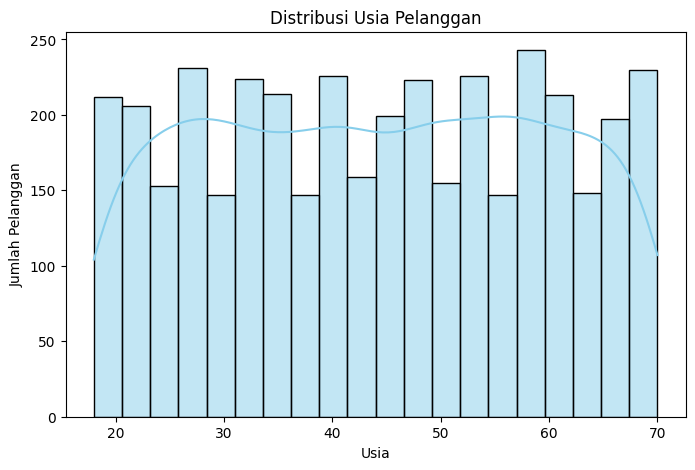

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Usia Pelanggan')
plt.xlabel('Usia')
plt.ylabel('Jumlah Pelanggan')
plt.show()


### Rata-rata Pengeluaran per Kategori
🔺 Kategori pengeluaran tertinggi yaitu footwear yang memiliki rata-rata pengeluaran sekitar 60.5 USD.

🔻 Kategori pengeluaran terendah yaitu outerwear yang memiliki rata-rata pengeluaran sekitar 57 USD.

🔄 Seluruh kategori memiliki nilai yang berdekatan (sekitar 57-61 USD), menandakan pengeluaran konsumen cukup merata di berbagai jenis produk.

📏 Terdapat error bar di atas setiap batang yang menunjukkan deviasi standar. Error bar yang pendek menunjukkan variasi data yang kecil dan konsisten antar kategori.

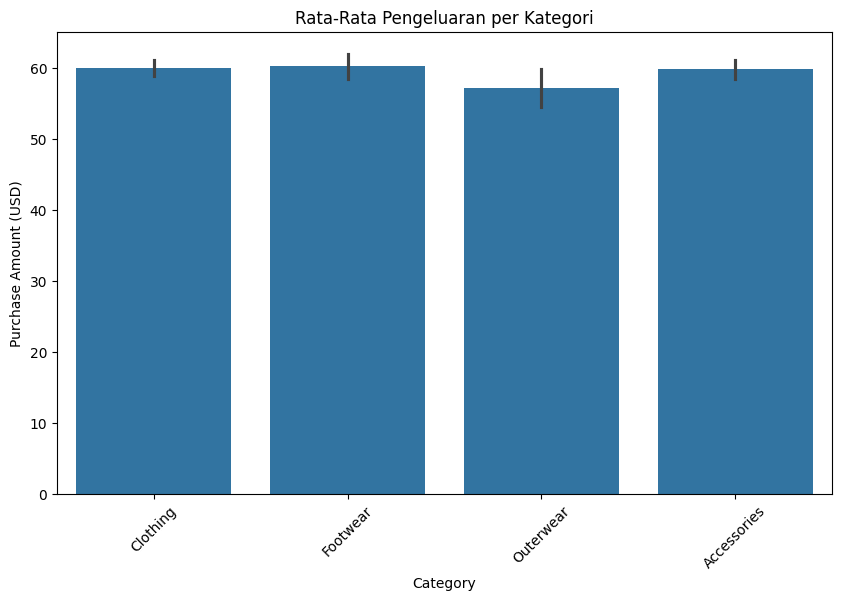

In [ ]:
# Rata-rata Pengeluaran per Kategori
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Category', y='Purchase Amount (USD)', estimator=np.mean)
plt.title('Rata-Rata Pengeluaran per Kategori')
plt.xticks(rotation=45)
plt.show()

### Distribusi Pengeluaran per Gender & Musim
✅ Jenis Diagram yaitu
Boxplot (Diagram Kotak-Garis)
Menampilkan sebaran data pengeluaran (dalam USD) berdasarkan kombinasi Gender dan Musim (Season).

- Semua musim memiliki rentang pengeluaran antara sekitar 20 hingga 100 USD.

- 🧔 Pada male (laki-laki) cenderung memiliki median pengeluaran sedikit lebih tinggi di musim Winter dan Fall dan sedikit lebih rendah di musim Summer dan Spring.

- Pada 👩 Female (Perempuan) di musim Summer dan Spring, median pengeluaran lebih tinggi dibandingkan Male dan distribusi pengeluaran perempuan di musim Summer tampak sedikit lebih lebar, menunjukkan variasi yang lebih besar.

- 🔎 Hampir tidak ada outlier ekstrem, menunjukkan data relatif terdistribusi secara merata.

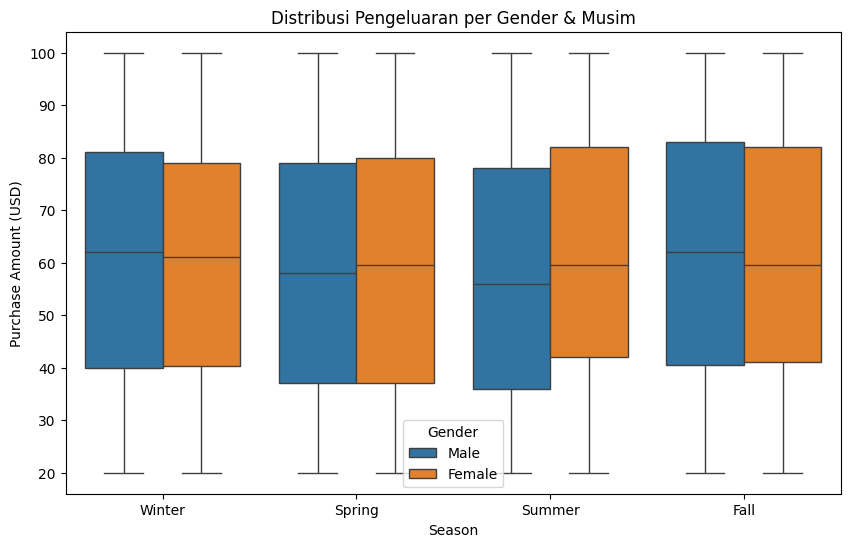

In [ ]:
# Pengeluaran Berdasarkan Gender dan Musim
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Season', y='Purchase Amount (USD)', hue='Gender')
plt.title('Distribusi Pengeluaran per Gender & Musim')
plt.show()

### Distribusi Frequency of Purchases
✅ Jenis diagram yaitu diagram batang horizontal (Horizontal Bar Chart).

- 🔝 Every 3 Months menjadi frekuensi paling umum, dengan jumlah pelanggan terbanyak mendekati 580 orang.

- 🟠 Seluruh kategori lainnya memiliki jumlah pelanggan berkisar antara 540–570 pelanggan, menunjukkan distribusi yang cukup merata.

- 📉 Weekly menjadi frekuensi yang paling sedikit, meskipun perbedaannya tidak terlalu signifikan dari kategori lainnya.



<ipython-input-15-3734170388>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_freq.values, y=order_freq.index, palette='pastel', legend=False)


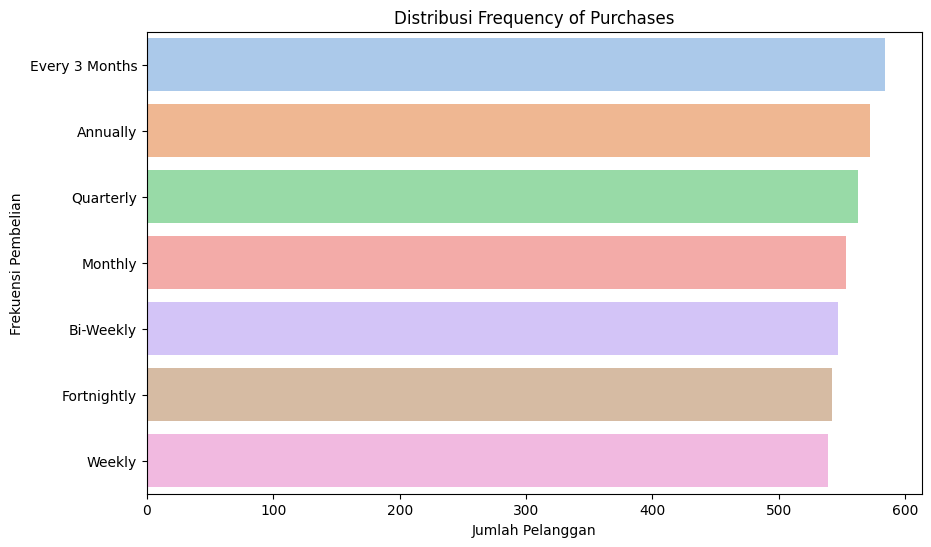

In [ ]:
# Distribusi Frequency of Purchases
plt.figure(figsize=(10, 6))
order_freq = df['Frequency of Purchases'].value_counts().sort_values(ascending=False)

sns.barplot(x=order_freq.values, y=order_freq.index, palette='pastel', legend=False)
plt.title('Distribusi Frequency of Purchases')
plt.xlabel('Jumlah Pelanggan')
plt.ylabel('Frekuensi Pembelian')
plt.show()

### 10 Produk Paling Sering Dibeli
✅ Jenis diagram yaitu horizontal bar chart (Diagram Batang Horizontal). Diagram menunjukkan 10 besar produk berdasarkan jumlah transaksi pembelian.

- 🔝 Blouse menduduki peringkat pertama sebagai produk yang paling sering dibeli.

- 📊 Hampir seluruh produk memiliki jumlah pembelian yang sangat mirip (berkisar antara 160–170), menunjukkan popularitas yang relatif merata.



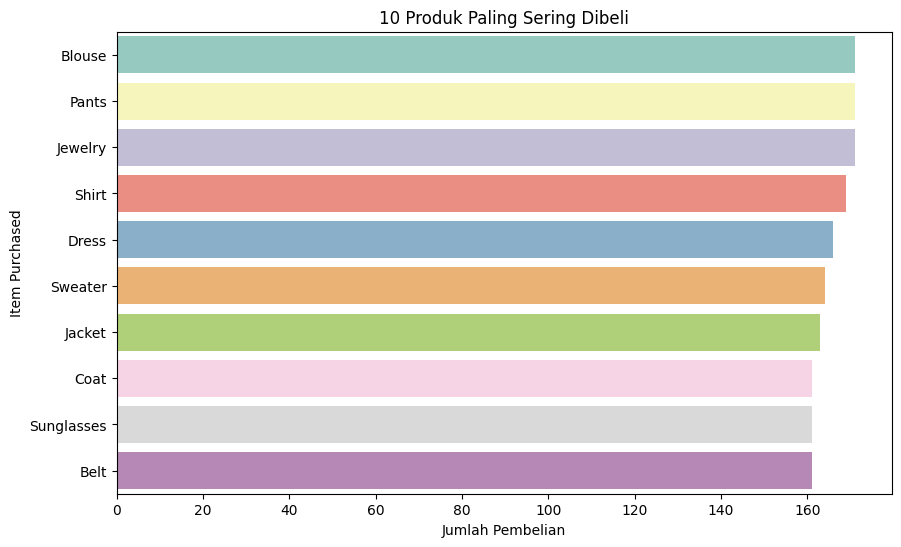

In [ ]:
# Produk Paling Sering Dibeli
plt.figure(figsize=(10,6))
top_items = df['Item Purchased'].value_counts().head(10)

sns.barplot(
    x=top_items.values,
    y=top_items.index,
    hue=top_items.index,
    palette='Set3',
    legend=False
)

plt.title('10 Produk Paling Sering Dibeli')
plt.xlabel('Jumlah Pembelian')
plt.ylabel('Item Purchased')
plt.show()


### 10 Produk Paling Jarang Dibeli
✅ Jenis Diagram
Horizontal Bar Chart (Diagram Batang Horizontal). Diagram menunjukkan produk dengan frekuensi pembelian terendah dalam dataset.

- 🔻 Jeans tercatat sebagai produk paling jarang dibeli dibandingkan produk lainnya.

- Produk seperti Gloves, Backpack, dan Boots umumnya bersifat musiman atau pelengkap, sehingga frekuensi pembelian lebih rendah.

- ⚠️ Meski produk-produk tersebut merupakan produk "paling jarang dibeli", perbedaannya tidak jauh dari yang lain — artinya masih cukup banyak diminati, hanya tidak sepopuler 10 teratas.

<ipython-input-17-1253896921>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=least_items.values, y=least_items.index, palette='Set2', legend=False)


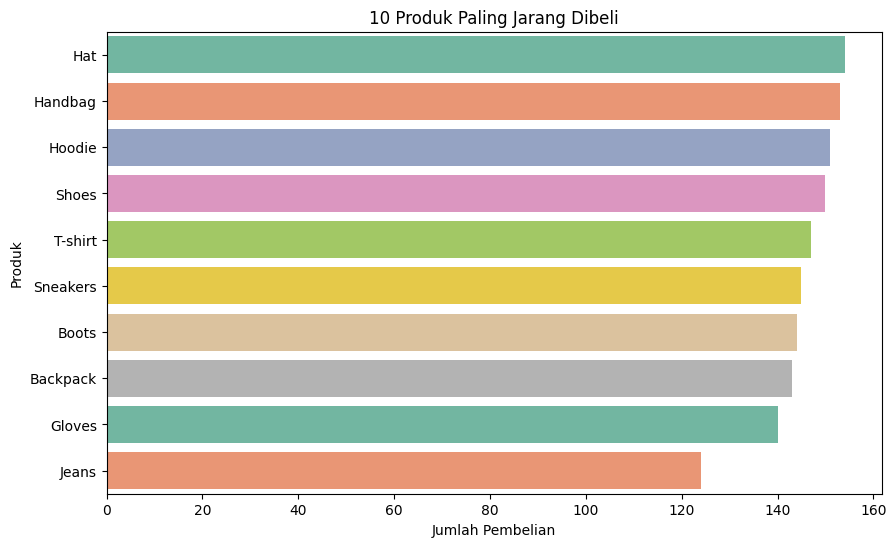

In [ ]:
# Produk Paling Jarang Dibeli (10 Terbawah)
plt.figure(figsize=(10, 6))
least_items = df['Item Purchased'].value_counts().tail(10)

sns.barplot(x=least_items.values, y=least_items.index, palette='Set2', legend=False)
plt.title('10 Produk Paling Jarang Dibeli')
plt.xlabel('Jumlah Pembelian')
plt.ylabel('Produk')
plt.show()

### Preferensi Metode Pembayaran Berdasarkan Kelompok Usia
✅ Jenis Visualisasi
Grouped Bar Chart (Diagram Batang Berkelompok).

- 🔹 Kelompok Usia 46–60 mendominasi jumlah transaksi, terutama dengan PayPal, Cash, dan Debit Card.

- 🔸 Usia 36–45 menunjukkan preferensi yang cukup tinggi terhadap PayPal dan Credit Card, mengindikasikan kenyamanan dengan pembayaran digital.

- 🟢 Metode paling populer yaitu PayPal dan Credit Card untuk usia 36 ke atas. Cash untuk kelompok 18–25 dan 46–60.

- 🔻 Kelompok <18 tahun memiliki jumlah transaksi yang jauh lebih rendah, dan lebih cenderung menggunakan Cash dan Credit Card, kemungkinan melalui orang tua atau wali.

In [ ]:
# Kelompokkan umur
bins = [0, 18, 25, 35, 45, 60, 100]
labels = ['<18', '18-25', '26-35', '36-45', '46-60', '60+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

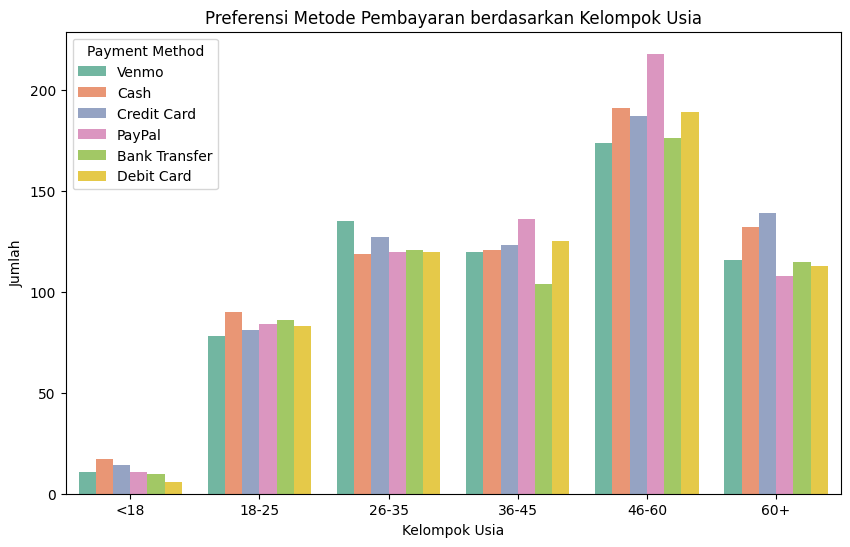

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Age Group', hue='Payment Method', palette='Set2')
plt.title('Preferensi Metode Pembayaran berdasarkan Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah')
plt.legend(title='Payment Method')
plt.show()

### Produk Paling Banyak Dibeli per Musim
✅ Jenis Visualisasi
Bar Chart (Diagram Batang Vertikal).

📌 Produk paling banyak dibeli pada setiap musim:
   Season Item Purchased  Count
0    Fall         Jacket     54
1  Spring        Sweater     52
2  Summer          Pants     50
3  Winter     Sunglasses     52


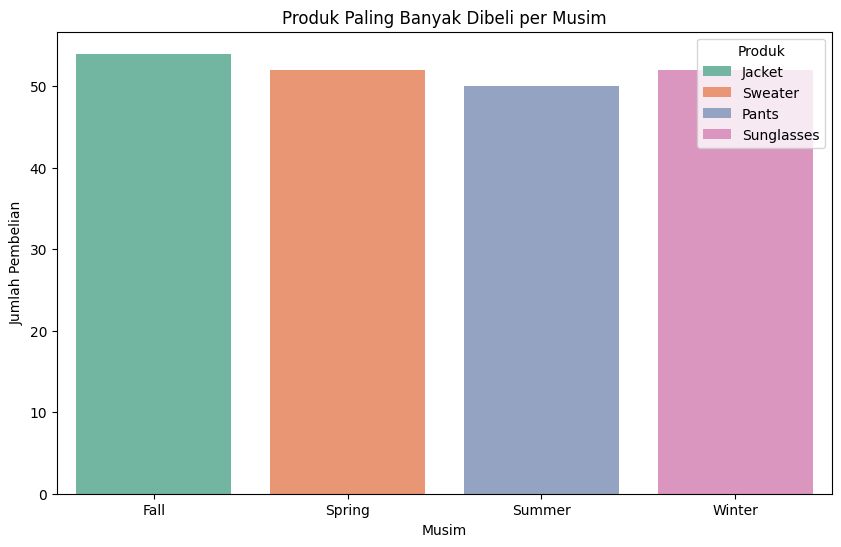

In [ ]:
# Grouping: hitung frekuensi pembelian per musim dan item
seasonal_top = df.groupby(['Season', 'Item Purchased']).size().reset_index(name='Count')

# Ambil item dengan jumlah tertinggi di tiap musim
top_items_per_season = seasonal_top.sort_values('Count', ascending=False).groupby('Season').first().reset_index()

# Tampilkan hasil
print("📌 Produk paling banyak dibeli pada setiap musim:")
print(top_items_per_season)

# Visualisasi
plt.figure(figsize=(10,6))
sns.barplot(data=top_items_per_season, x='Season', y='Count', hue='Item Purchased', palette='Set2')
plt.title('Produk Paling Banyak Dibeli per Musim')
plt.ylabel('Jumlah Pembelian')
plt.xlabel('Musim')
plt.legend(title='Produk')
plt.show()

### 10 Lokasi dengan Item Purchased Terbanyak
✅ Jenis Visualisasi
Bar Chart Horizontal (Diagram Batang Horizontal)

- 🥇 Montana mencatat jumlah pembelian terbanyak, sedikit lebih tinggi dibandingkan negara bagian lainnya.

- 🥈 California, meskipun merupakan wilayah dengan populasi besar, berada di peringkat kedua.

- 📊 Perbedaan antar lokasi tidak terlalu signifikan, dengan kisaran pembelian yang cukup merata, sekitar 85–95 item.

<ipython-input-21-573069965>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_item_counts.values, y=location_item_counts.index, palette='Set3')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


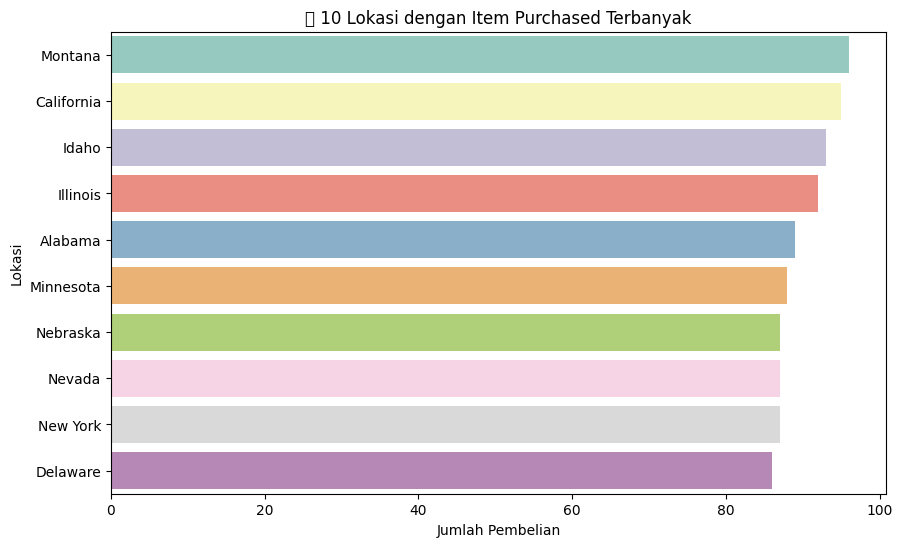

In [ ]:
# Hitung jumlah pembelian per lokasi
location_item_counts = df.groupby('Location').size().sort_values(ascending=False).head(10)

# Visualisasi
plt.figure(figsize=(10,6))
sns.barplot(x=location_item_counts.values, y=location_item_counts.index, palette='Set3')
plt.title('📍 10 Lokasi dengan Item Purchased Terbanyak')
plt.xlabel('Jumlah Pembelian')
plt.ylabel('Lokasi')
plt.show()

### Produk Paling Laris di 5 Lokasi Teratas
✅ Jenis Visualisasi
Bar Chart Kategori Multi-Lokasi (Grouped Bar Chart)

- 🧥 Montana menunjukkan pembelian tinggi untuk produk seperti Jacket, Sandals, dan Sneakers.

- 👕 Alabama tampak dominan pada pembelian T-shirt, Shoes, dan Coat.

- 😎 California konsisten dengan jumlah tinggi di hampir semua item—terutama Sunglasses, Jeans, dan Backpack.

- 🧣 Illinois mencatatkan puncak tertinggi untuk Shirt dan Socks.

- 🧥 Idaho cukup tinggi dalam pembelian Coat, Sneakers, dan Blouse.

<ipython-input-22-1468880353>:15: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


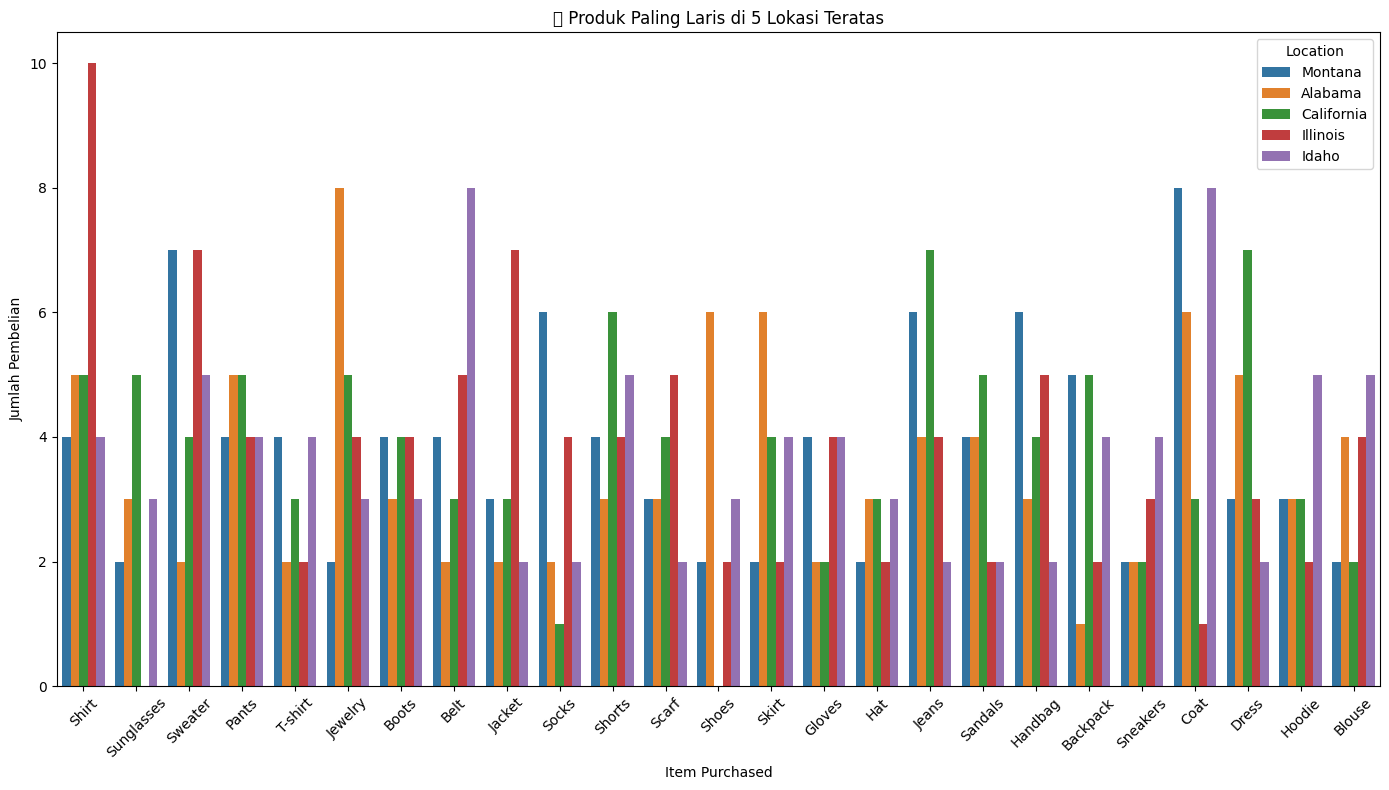

In [ ]:
# Ambil 5 lokasi dengan pembelian terbanyak
top_locations = df['Location'].value_counts().head(5).index

# Filter data hanya untuk lokasi tersebut
df_top_locs = df[df['Location'].isin(top_locations)]

# Hitung produk terbanyak di setiap lokasi
plt.figure(figsize=(14,8))
sns.countplot(data=df_top_locs, x='Item Purchased', hue='Location')
plt.title('📍 Produk Paling Laris di 5 Lokasi Teratas')
plt.xticks(rotation=45)
plt.xlabel('Item Purchased')
plt.ylabel('Jumlah Pembelian')
plt.legend(title='Location')
plt.tight_layout()
plt.show()

### 10 Produk dengan Review Rating Tertinggi

<ipython-input-23-2938150252>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated.values, y=top_rated.index, palette='viridis')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


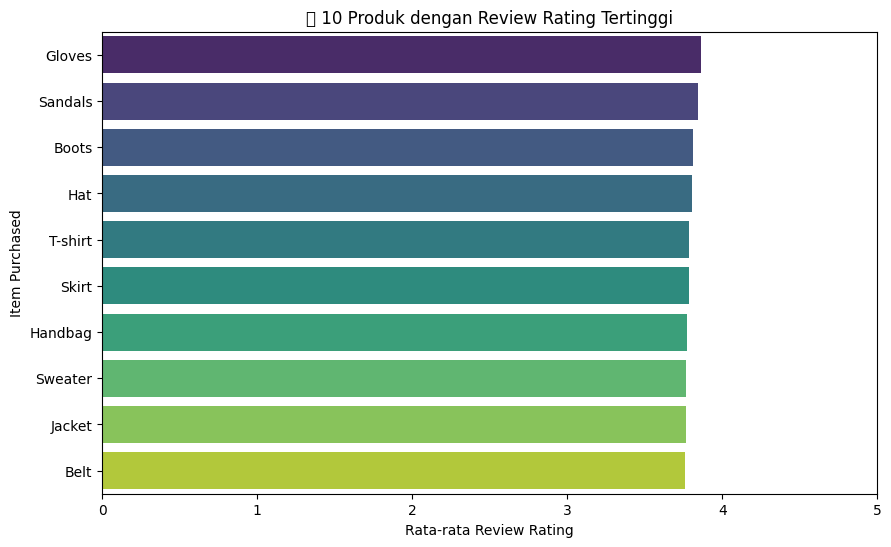

In [ ]:
# Hitung rata-rata rating per produk
top_rated = df.groupby('Item Purchased')['Review Rating'].mean().sort_values(ascending=False).head(10)

# Visualisasi
plt.figure(figsize=(10,6))
sns.barplot(x=top_rated.values, y=top_rated.index, palette='viridis')
plt.title('🌟 10 Produk dengan Review Rating Tertinggi')
plt.xlabel('Rata-rata Review Rating')
plt.ylabel('Item Purchased')
plt.xlim(0, 5)  # rating biasanya 1–5
plt.show()

### Korelasi Antar Variabel Numerik

In [ ]:
# Pilih kolom numerik (selain ID)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = [col for col in numerical_cols if col not in ['Customer ID', 'Unnamed: 0']]

# Hitung korelasi
corr_matrix = df[numerical_cols].corr()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


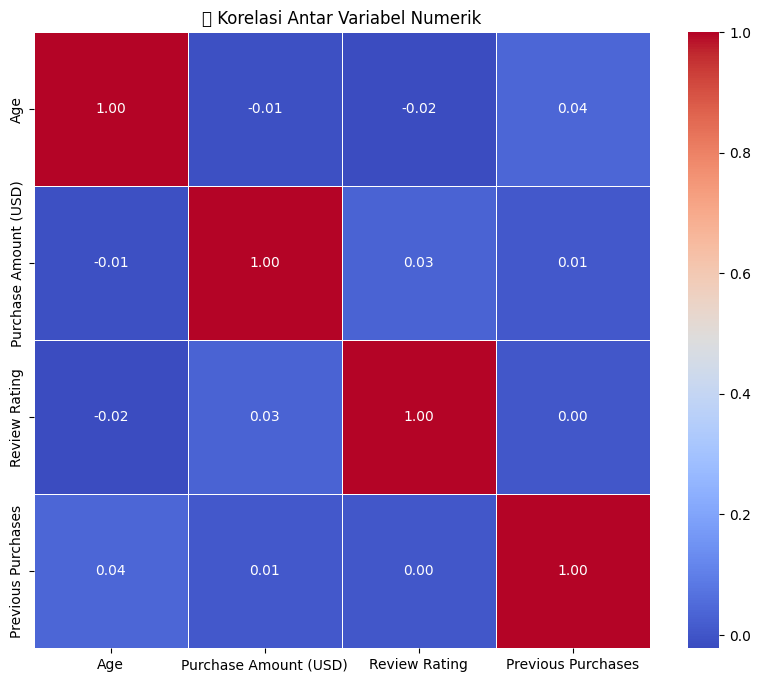

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    square=True,
    linewidths=0.5
)
plt.title('🔗 Korelasi Antar Variabel Numerik')
plt.show()

## Clustering

In [ ]:
# Pilih semua kolom numerik (sudah dinormalisasi atau distandarisasi sebelumnya)
X = df_scaled

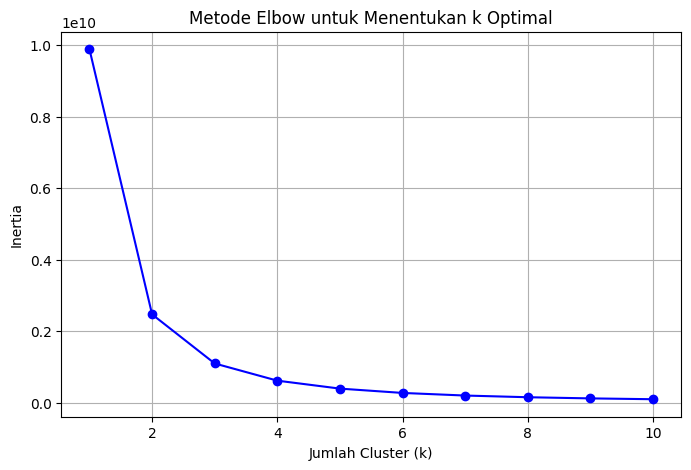

In [ ]:
# Menentukan Jumlah Cluster Optimal (Metode Elbow)
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan k Optimal')
plt.grid(True)
plt.show()

In [ ]:
# 🔧 Inisialisasi dictionary untuk menyimpan hasil
results = {}

# 📌 K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X)
results['KMeans'] = {
    'labels': labels_kmeans,
    'silhouette': silhouette_score(X, labels_kmeans),
    'davies': davies_bouldin_score(X, labels_kmeans)
}

# 📌 Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
labels_agglo = agglo.fit_predict(X)
results['Agglomerative'] = {
    'labels': labels_agglo,
    'silhouette': silhouette_score(X, labels_agglo),
    'davies': davies_bouldin_score(X, labels_agglo)
}

# 📌 Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3, random_state=42)
labels_gmm = gmm.fit_predict(X)
results['GMM'] = {
    'labels': labels_gmm,
    'silhouette': silhouette_score(X, labels_gmm),
    'davies': davies_bouldin_score(X, labels_gmm)
}

# 📊 Tampilkan Hasil Evaluasi
for model, metrics in results.items():
    print(f"🔍 {model}")
    print(f"   🟢 Silhouette Score: {metrics['silhouette']:.4f}" if metrics['silhouette'] is not None else "   ❌ Silhouette tidak valid")
    print(f"   🔵 Davies-Bouldin Index: {metrics['davies']:.4f}" if metrics['davies'] is not None else "   ❌ Davies-Bouldin tidak valid")
    print()



🔍 KMeans
   🟢 Silhouette Score: 0.5896
   🔵 Davies-Bouldin Index: 0.5002

🔍 Agglomerative
   🟢 Silhouette Score: 0.5828
   🔵 Davies-Bouldin Index: 0.5003

🔍 GMM
   🟢 Silhouette Score: 0.5269
   🔵 Davies-Bouldin Index: 0.5581



✅ KMeans menunjukkan cluster yang paling terpisah dan kompak. Cocok jika data berskala seragam dan tidak terlalu kompleks secara bentuk distribusi.

✅ Agglomerative Clustering memiliki kinerja hampir setara dengan KMeans. Cocok jika ingin mengamati struktur hirarki antar data. Namun, tidak seefisien KMeans dalam hal performa.

⚠️ Gaussian Mixture Model (GMM) mengasumsikan distribusi probabilistik. Skor yang lebih rendah menunjukkan bahwa model ini mungkin tidak cocok untuk struktur cluster dataset yang digunakan, atau distribusi tiap cluster tidak menyerupai Gaussian/Normal.



## Analisis Cluster (KMeans dengan 3 cluster dan Silhouette Score tertinggi)

In [ ]:
# Hasil fit_predict dari model yang dipilih dan menambahkan ke dataframe asli
df_clustered = df.copy()
df_clustered['Cluster'] = labels_kmeans  # Ganti sesuai model terbaik

In [ ]:
# Jumlah anggota tiap cluster
print(df_clustered['Cluster'].value_counts())

Cluster
1    1301
0    1300
2    1299
Name: count, dtype: int64


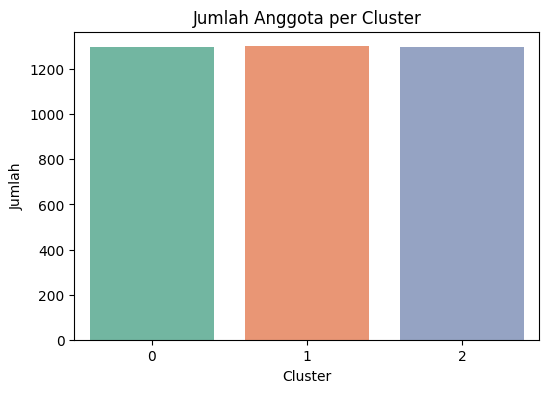

In [ ]:
# Visualisasi jumlah anggota tiap cluster
plt.figure(figsize=(6,4))
sns.countplot(data=df_clustered, x='Cluster', hue='Cluster', palette='Set2', legend=False)
plt.title('Jumlah Anggota per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
# Statistik Deskriptif per Cluster
# Fitur Numerik
print(df_clustered.groupby('Cluster')[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']].mean())

               Age  Purchase Amount (USD)  Review Rating  Previous Purchases
Cluster                                                                     
0        43.897692              59.178462       3.773077           25.300769
1        43.984627              60.249039       3.738739           24.621061
2        44.323326              59.865281       3.738029           26.133949


### 🔍 Interpretasi dan Karakterisasi Cluster
Cluster 0 "Pembeli Stabil dan Loyal"
- Usia: Sedikit di bawah rata-rata
- Review: Tertinggi (3.77)
- Frekuensi beli: Sedang
- Pengeluaran: Terendah dari 3 cluster
- Karakteristik: Cenderung puas terhadap produk dan loyal (review tinggi). Tidak terlalu konsumtif, tapi stabil.

Cluster 1 "Pembeli Aktif dan Konsumtif"
- Pengeluaran tertinggi
- Review cukup baik
- Jumlah pembelian sebelumnya paling sedikit
- Karakteristik: Potensial pelanggan baru yang mulai aktif berbelanja.

Cluster 2 "Pelanggan Setia dengan Pembelian Tinggi"
- Usia tertinggi
- Pembelian sebelumnya paling tinggi
- Review cukup baik
- Pengeluaran hampir setara dengan cluster 1
- Karakteristik: Pelanggan lama yang sering membeli.

In [ ]:
# Statistik Deskriptif per Cluster
# Fitur Kategorikal

categorical_cols = [
    'Gender', 'Item Purchased', 'Category', 'Location', 'Color', 'Season',
    'Subscription Status', 'Shipping Type', 'Discount Applied',
    'Promo Code Used', 'Payment Method', 'Frequency of Purchases'
]

for col in categorical_cols:
    print(f"\n📊 Distribusi {col} per Cluster:")
    display(pd.crosstab(df_clustered['Cluster'], df_clustered[col], normalize='index') * 100)



📊 Distribusi Gender per Cluster:


Gender,Female,Male
Cluster,,
0,0.000000,100.000000
1,95.926211,4.073789
2,0.000000,100.000000



📊 Distribusi Item Purchased per Cluster:


Item Purchased,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
Cluster,,,,,,,,,,,,,,,,,,,,,
0,4.307692,4.153846,5.153846,3.230769,3.846154,4.076923,4.153846,3.538462,3.230769,3.076923,...,4.384615,3.769231,3.615385,4.307692,4.384615,3.769231,4.538462,4.076923,3.769231,4.000000
1,2.997694,4.381245,5.226749,3.843198,3.689470,4.227517,3.074558,4.534973,3.996925,4.150653,...,3.689470,4.688701,4.073789,3.766334,4.073789,3.305150,4.534973,4.534973,3.920061,3.689470
2,3.695150,3.849115,2.771363,4.003079,4.849885,4.464973,3.541186,3.695150,4.618938,4.387991,...,4.003079,4.541955,3.849115,4.003079,3.695150,4.080062,3.156274,3.772132,4.926867,3.618168



📊 Distribusi Category per Cluster:


Category,Accessories,Clothing,Footwear,Outerwear
Cluster,,,,
0,32.538462,44.923077,14.461538,8.076923
1,31.283628,44.581091,15.910838,8.224443
2,31.562741,44.110855,15.704388,8.622017



📊 Distribusi Location per Cluster:


Location,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Cluster,,,,,,,,,,,,,,,,,,,,,
0,2.769231,2.000000,1.615385,2.153846,2.538462,1.923077,2.000000,2.153846,1.692308,1.692308,...,1.846154,2.153846,1.846154,1.384615,2.538462,2.076923,1.769231,1.846154,2.307692,1.923077
1,2.152191,1.998463,1.998463,1.998463,2.229055,2.229055,2.229055,1.921599,1.537279,2.382782,...,1.844735,2.152191,2.536510,2.152191,1.921599,1.844735,1.998463,1.844735,1.921599,1.614143
2,1.924557,1.539646,1.385681,1.924557,2.540416,1.616628,1.770593,2.540416,2.001540,2.001540,...,1.693610,1.616628,1.539646,1.924557,2.078522,2.001540,1.847575,2.540416,1.539646,1.924557



📊 Distribusi Color per Cluster:


Color,Beige,Black,Blue,Brown,Charcoal,Cyan,Gold,Gray,Green,Indigo,...,Peach,Pink,Purple,Red,Silver,Teal,Turquoise,Violet,White,Yellow
Cluster,,,,,,,,,,,,,,,,,,,,,
0,4.076923,4.615385,3.769231,4.153846,3.230769,4.615385,4.307692,4.230769,4.307692,3.769231,...,4.153846,3.846154,4.000000,3.846154,4.538462,4.384615,3.615385,4.230769,3.230769,4.384615
1,3.228286,4.534973,3.996925,3.612606,3.843198,3.766334,3.382014,4.227517,4.304381,3.612606,...,3.920061,4.611837,3.382014,3.458878,4.304381,4.227517,3.382014,4.227517,3.535742,4.688701
2,4.003079,3.695150,3.926097,3.079292,4.695920,4.387991,2.925327,3.772132,4.387991,3.926097,...,3.387221,3.310239,4.234026,4.080062,4.464973,4.618938,4.157044,4.311008,4.157044,4.311008



📊 Distribusi Season per Cluster:


Season,Fall,Spring,Summer,Winter
Cluster,,,,
0,24.384615,24.846154,25.384615,25.384615
1,26.210607,25.672560,23.827825,24.289008
2,24.403387,26.327945,24.249423,25.019246



📊 Distribusi Subscription Status per Cluster:


Subscription Status,No,Yes
Cluster,,
0,100.000000,0.000000
1,100.000000,0.000000
2,18.937644,81.062356



📊 Distribusi Shipping Type per Cluster:


Shipping Type,2-Day Shipping,Express,Free Shipping,Next Day Air,Standard,Store Pickup
Cluster,,,,,,
0,16.769231,16.000000,16.076923,18.000000,16.461538,16.692308
1,16.525749,15.757110,19.523444,15.449654,16.910069,15.833974
2,14.934565,17.936875,16.320246,16.397229,16.936105,17.474981



📊 Distribusi Discount Applied per Cluster:


Discount Applied,No,Yes
Cluster,,
0,70.923077,29.076923
1,100.000000,0.000000
2,0.000000,100.000000



📊 Distribusi Promo Code Used per Cluster:


Promo Code Used,No,Yes
Cluster,,
0,70.923077,29.076923
1,100.000000,0.000000
2,0.000000,100.000000



📊 Distribusi Payment Method per Cluster:


Payment Method,Bank Transfer,Cash,Credit Card,Debit Card,PayPal,Venmo
Cluster,,,,,,
0,15.384615,18.000000,16.615385,16.923077,17.769231,15.307692
1,16.525749,17.063797,17.986164,14.450423,17.448117,16.525749
2,15.165512,16.474211,17.013087,17.551963,16.859122,16.936105



📊 Distribusi Frequency of Purchases per Cluster:


Frequency of Purchases,Annually,Bi-Weekly,Every 3 Months,Fortnightly,Monthly,Quarterly,Weekly
Cluster,,,,,,,
0,13.846154,13.769231,14.769231,13.923077,14.076923,16.230769,13.384615
1,15.372790,14.988470,14.834743,13.066872,14.604151,13.604919,13.528055
2,14.780600,13.317937,15.319477,14.703618,13.856813,13.471901,14.549654


Text(0.5, 1.0, 'Heatmap Karakteristik Rata-Rata per Cluster')

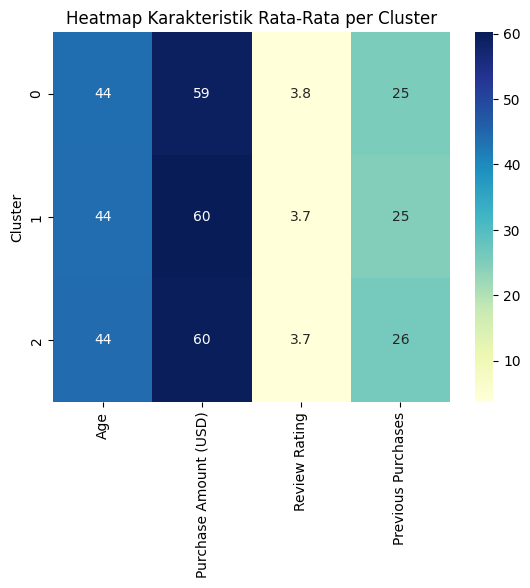

In [ ]:
# Heatmap: Rata-rata Fitur Numerik per Cluster
import seaborn as sns
import matplotlib.pyplot as plt

cluster_means = df_clustered.groupby('Cluster')[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']].mean()
sns.heatmap(cluster_means, annot=True, cmap='YlGnBu')
plt.title("Heatmap Karakteristik Rata-Rata per Cluster")

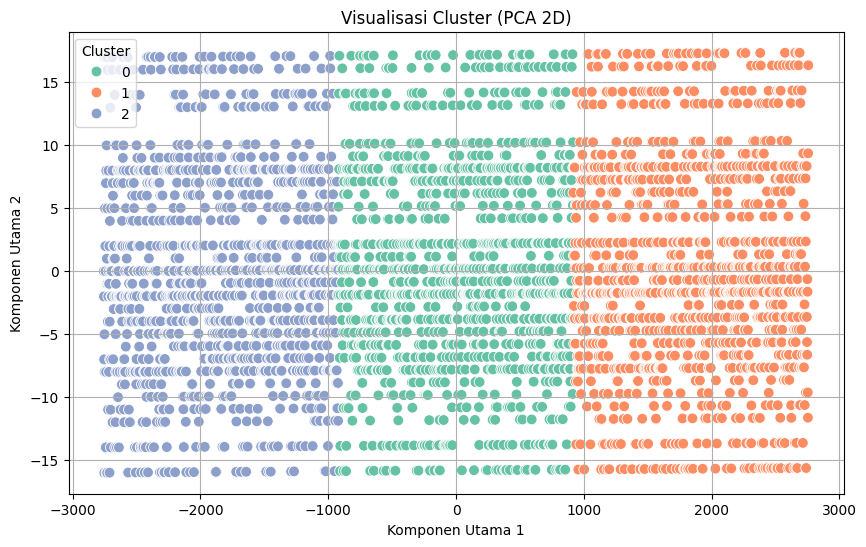

In [ ]:
# Visualisasi Cluster (PCA 2D)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

# Buat DataFrame untuk visualisasi
df_pca = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df_clustered['Cluster']

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=60)
plt.title('Visualisasi Cluster (PCA 2D)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()



### 📊 Analisis Visualisasi Cluster
✅ Pemisahan yang Jelas untuk cluster 0, 1, dan 2 sehingga cukup baik di ruang dua dimensi hasil PCA.

✅ Komponen utama 1 (PC1) menjadi dimensi utama yang memisahkan cluster, yang menunjukkan bahwa variabel yang paling berkontribusi terhadap PC1 sangat berperan dalam pemisahan cluster.

✅ Ukuran dan sebaran titik dari ketiga cluster terlihat cukup merata, sesuai dengan jumlah anggota masing-masing yang hampir sama:
- Cluster 0: 1300
- Cluster 1: 1301
- Cluster 2: 1299

### Kesimpulan Strategis
Segmentasi berbasis perilaku dan demografi ini sangat berguna untuk:

- Retensi pelanggan

- Personalisasi promosi

- Pengembangan produk spesifik segmen

In [ ]:
# Simpan Hasil Clustering
df_clustered.to_excel('hasil_customer_clustering.xlsx', index=False)